# K-means 

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
k = 3
max_iterations = 100

def initial_cluster_centroids(X, k):
    return X[0:k, :]

def assign_cluster(X, centroids):
    expanded_vectors = tf.expand_dims(X, 0)
    #print("Expanded vectors :", expanded_vectors)
    expanded_centroids = tf.expand_dims(centroids, 1)
    #print("Expanded centroids :", expanded_centroids )
    distances = tf.reduce_sum(tf.square(tf.subtract(expanded_vectors,expanded_centroids)), 2)
    #print("Distances :", distances)
    mins = tf.argmin(distances, 0)
    #print("Mins :", mins)
    return mins

def recompute_centroids(X, Y):
    sums = tf.unsorted_segment_sum(X, Y, k)
    counts = tf.unsorted_segment_sum(tf.ones_like(X), Y, k)
    return sums / counts



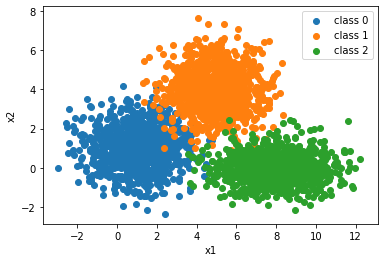

In [3]:
# Gernerate fake 2D data 
# (1,1) (5,4) (8,0)
x1_l1=np.random.normal(1,1.3,[1000,1])
x1_l2=np.random.normal(5,1.2,[1000,1])
x1_l3=np.random.normal(8,1.5,[1000,1])
x2_l1=np.random.normal(1,1.0,[1000,1])
x2_l2=np.random.normal(4,1.1,[1000,1])
x2_l3=np.random.normal(0,0.7,[1000,1])

x1=np.concatenate((x1_l1,x1_l2,x1_l3),axis=0)
x2=np.concatenate((x2_l1,x2_l2,x2_l3),axis=0)
x=np.concatenate((x1,x2),axis=1)
y=np.matrix([[1,0.,0.]]*len(x1_l1)+[[0.,1.,0.]]*len(x2_l2)+[[0.,0.,1.]]*len(x2_l3))

# preview data
plt.scatter(x1_l1,x2_l1,label='class 0')
plt.scatter(x1_l2,x2_l2,label='class 1')
plt.scatter(x1_l3,x2_l3,label='class 2')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [4]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    X = x
    centroids = initial_cluster_centroids(X, k)
    i, converged = 0, False
    while not converged and i < max_iterations:
        i += 1
        Y = assign_cluster(X, centroids)
        centroids = sess.run(recompute_centroids(X, Y))
    print(centroids)

Mins : Tensor("ArgMin:0", shape=(3000,), dtype=int64)
Mins : Tensor("ArgMin_1:0", shape=(3000,), dtype=int64)
Mins : Tensor("ArgMin_2:0", shape=(3000,), dtype=int64)
Mins : Tensor("ArgMin_3:0", shape=(3000,), dtype=int64)
Mins : Tensor("ArgMin_4:0", shape=(3000,), dtype=int64)
Mins : Tensor("ArgMin_5:0", shape=(3000,), dtype=int64)
Mins : Tensor("ArgMin_6:0", shape=(3000,), dtype=int64)
Mins : Tensor("ArgMin_7:0", shape=(3000,), dtype=int64)
Mins : Tensor("ArgMin_8:0", shape=(3000,), dtype=int64)
Mins : Tensor("ArgMin_9:0", shape=(3000,), dtype=int64)
Mins : Tensor("ArgMin_10:0", shape=(3000,), dtype=int64)
Mins : Tensor("ArgMin_11:0", shape=(3000,), dtype=int64)
Mins : Tensor("ArgMin_12:0", shape=(3000,), dtype=int64)
Mins : Tensor("ArgMin_13:0", shape=(3000,), dtype=int64)
Mins : Tensor("ArgMin_14:0", shape=(3000,), dtype=int64)
Mins : Tensor("ArgMin_15:0", shape=(3000,), dtype=int64)
Mins : Tensor("ArgMin_16:0", shape=(3000,), dtype=int64)
Mins : Tensor("ArgMin_17:0", shape=(3000,),

In [5]:
k = 5
n = 100
variables = 2
points = np.random.uniform(0, 1000, [n, variables])

input_fn=lambda: tf.train.limit_epochs(tf.convert_to_tensor(points, dtype=tf.float32), num_epochs=1)

kmeans=tf.contrib.factorization.KMeansClustering(num_clusters=k, use_mini_batch=False)
previous_centers = None
for _ in range(10):
  kmeans.train(input_fn)
  centers = kmeans.cluster_centers()
  if previous_centers is not None:
    print ('delta:', centers - previous_centers)
  previous_centers = centers
  print ('score:', kmeans.score(input_fn))
print( 'centers:', centers)
cluster_indices = list(kmeans.predict_cluster_index(input_fn))
for i, point in enumerate(points):
  cluster_index = cluster_indices[i]
  print( 'point:', point, 'is in cluster', cluster_index, 'centered at', centers[cluster_index])


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\sagar\\AppData\\Local\\Temp\\tmpn97sc1z0', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001DECDAC73C8>, '_task_type': 'worker', '_task_id': 0, '_gl

INFO:tensorflow:Loss for final step: 3372929.0.
delta: [[ -7.977829    -8.589035  ]
 [  0.           0.        ]
 [ 12.761536   -20.092224  ]
 [  0.           0.        ]
 [ -0.60554504  -9.1362915 ]]
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-08-02T15:33:05Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\sagar\AppData\Local\Temp\tmpn97sc1z0\model.ckpt-7
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2019-08-02-15:33:05
INFO:tensorflow:Saving dict for global step 7: global_step = 7, loss = 3348187.5, score = 3348187.5
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 7: C:\Users\sagar\AppData\Local\Temp\tmpn97sc1z0\model.ckpt-7
score: 3348187.5
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSav

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 17: C:\Users\sagar\AppData\Local\Temp\tmpn97sc1z0\model.ckpt-17
score: 3257927.0
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\sagar\AppData\Local\Temp\tmpn97sc1z0\model.ckpt-17
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 17 into C:\Users\sagar\AppData\Local\Temp\tmpn97sc1z0\model.ckpt.
INFO:tensorflow:loss = 3257927.0, step = 18
INFO:tensorflow:Saving checkpoints for 19 into C:\Users\sagar\AppData\Local\Temp\tmpn97sc1z0\model.ckpt.
INFO:tensorflow:Loss for final step: 3257927.0.
delta: [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-08-02T15:33:14Z
INFO:tensorflow:Graph was f

# Self Organizing Map using Minisom

In [6]:
from minisom import MiniSom    
som = MiniSom(6, 6, 2, sigma=0.5, learning_rate=0.5)
som.train_random(x, 100)

# SOM with TF

In [7]:
class SOM(object):
    def __init__(self, x, y, input_dim, learning_rate, radius, num_iter=111):
        
        #Initialize properties
        self._x = x
        self._y = y
        self._learning_rate = float(learning_rate)
        self._radius = float(radius)
        self._num_iter = num_iter
        self._graph = tf.Graph()
 
        #Initialize graph
        with self._graph.as_default():
            
            #Initializing variables and placeholders
            self._weights = tf.Variable(tf.random_normal([x*y, input_dim]))
            self._locations = self._generate_index_matrix(x, y)
            self._input = tf.placeholder("float", [input_dim])
            self._iter_input = tf.placeholder("float")
 
            #Calculating BMU
            input_matix = tf.stack([self._input for i in range(x*y)])
            distances = tf.sqrt(tf.reduce_sum(tf.pow(tf.subtract(self._weights, input_matix), 2), 1))
            bmu = tf.argmin(distances, 0)
            
            #Get BMU location
            mask = tf.pad(tf.reshape(bmu, [1]), np.array([[0, 1]]))
            size = tf.cast(tf.constant(np.array([1, 2])), dtype=tf.int64)
            bmu_location = tf.reshape(tf.slice(self._locations, mask, size), [2])
 
            #Calculate learning rate and radius
            decay_function = tf.subtract(1.0, tf.divide(self._iter_input, self._num_iter))
            _current_learning_rate = tf.multiply(self._learning_rate, decay_function)
            _current_radius = tf.multiply(self._radius, decay_function)
 
            #Adapt learning rate to each neuron based on position
            bmu_matrix = tf.stack([bmu_location for i in range(x*y)])
            bmu_distance = tf.reduce_sum(tf.pow(tf.subtract(self._locations, bmu_matrix), 2), 1)
            neighbourhood_func = tf.exp(tf.negative(tf.divide(tf.cast(bmu_distance, "float32"), tf.pow(_current_radius, 2))))
            learning_rate_matrix = tf.multiply(_current_learning_rate, neighbourhood_func)
 
            #Update all the weights
            multiplytiplier = tf.stack([tf.tile(tf.slice(
                learning_rate_matrix, np.array([i]), np.array([1])), [input_dim])
                                               for i in range(x*y)])
            delta = tf.multiply(
                multiplytiplier,
                tf.subtract(tf.stack([self._input for i in range(x*y)]), self._weights))                
                         
            new_weights = tf.add(self._weights, delta)
            self._training = tf.assign(self._weights, new_weights)                                       
 
            #Initilize session and run it
            self._sess = tf.Session()
            initialization = tf.global_variables_initializer()
            self._sess.run(initialization)
 
    def train(self, input_vects):
        for iter_no in range(self._num_iter):
            for input_vect in input_vects:
                self._sess.run(self._training,
                               feed_dict={self._input: input_vect,
                                          self._iter_input: iter_no})
 
        self._centroid_matrix = [[] for i in range(self._x)]
        self._weights_list = list(self._sess.run(self._weights))
        self._locations = list(self._sess.run(self._locations))
        for i, loc in enumerate(self._locations):
            self._centroid_matrix[loc[0]].append(self._weights_list[i])
  
    def map_input(self, input_vectors):
        return_value = []
        for vect in input_vectors:
            min_index = min([i for i in range(len(self._weights_list))],
                            key=lambda x: np.linalg.norm(vect - self._weights_list[x]))
            return_value.append(self._locations[min_index])
        return return_value
    
    def _generate_index_matrix(self, x,y):
        return tf.constant(np.array(list(self._iterator(x, y))))
    
    def _iterator(self, x, y):
        for i in range(x):
            for j in range(y):
                yield np.array([i, j])

In [8]:
#from somtf import SOM

som = SOM(6, 6, 2, 0.5, 0.5, 100)
som.train(x)